In [ ]:
# Import packages needed for data analysis
import pandas as pd
import numpy as np
# Visualization package
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

#Data preprocessing
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
import sklearn

#from sklearn.externals import joblib 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from imblearn.combine import SMOTEENN 



In [104]:
# Loading the data
CustDF = pd.read_csv('WA_Fn-UseC_-Telco-Customer_Churn - Copy.csv') 

In [105]:
CustDF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
#info and datatypes
CustDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [107]:
CustDF.shape

(7043, 21)

In [108]:
CustDF.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [109]:
#Numerical variables descriptive statisitics 
CustDF.describe()



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen 25%-50%-75% is not distributed properly

In [110]:
#check for missing values
CustDF.isnull().values.any()

False

No missing values

Text(0.5, 1.0, 'Count of Expected Variable for each Catergory')

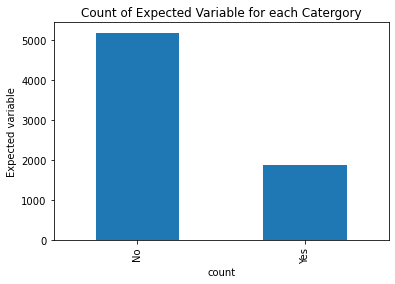

In [111]:
#Detecting outliers
CustDF['Churn'].value_counts().plot(kind='bar')
plt.xlabel('count')
plt.ylabel('Expected variable')
plt.title('Count of Expected Variable for each Catergory')
#df.MonthlyCharges.plot(kind='hist', title='Histogram for Monthly Charges', bins=40, color='c');

In [112]:
CustDF['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [113]:
#Balance ratio of churn data
(CustDF['Churn'].value_counts()/len(CustDF['Churn']))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Ratio = 73:26 ,  implies data is highly imbalanced.

Text(0.5, 1.0, 'Count of Expected Variable for each Catergory')

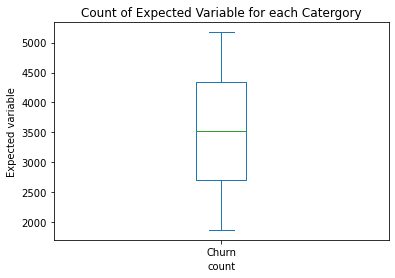

In [114]:
#Detecting outliers
CustDF['Churn'].value_counts().plot(kind='box')
plt.xlabel('count')
plt.ylabel('Expected variable')
plt.title('Count of Expected Variable for each Catergory')

No outliers

## Data cleaning

In [116]:
#copy of data preprocessing
CustDF = CustDF.copy()

In [117]:
CustDF.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


TotalCharges not included in table above because it has an object data type

In [118]:
#Convert TotalCharges to numeric data type.
CustDF.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
CustDF.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [119]:
CustDF.loc[CustDF['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


They are 11 missing values in the TotalCharges column.

In [120]:
#Treating missing values with median
CustDF['TotalCharges'] = CustDF['TotalCharges'].fillna((CustDF['TotalCharges'].median()))
CustDF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
#Binning
#Base on tenure, customers are divided into bins.
print(CustDF['tenure'].max())

72


In [124]:
#Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]
#create new feature called tenure_group
CustDF['Tenure_group'] = pd.cut(CustDF.tenure, range(1, 80, 12), right = False, labels = labels)
CustDF['Tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure_group, dtype: int64

In [125]:
CustDF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [126]:
#drop columns that are not required of data processing
#dropping cutomerID and tenure
CustDF.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
CustDF.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [151]:
#Data Normalization
#The values Yes and No in the churn column are replaced with 1 and 0 respectively for better data processing
df['Churn'].replace( 'Yes', 1,inplace = True)
df['Churn'].replace( 'No',  0,inplace = True)
df['Churn'].head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## Data Exploration

3 Categories of Attributes
1. Customer Attributes
-Gender
-SeniorCitizen
-Partner
-Dependencies
2. Service Attributes
-Tenure_group
-Phoneservice
-MultipleLines
-InternetService
-OnlineSecurity
-OnlineBackup
-DeviceProtection
-Techsupport
-StreamingTV
-StreamingMovies
3. Contract Attributes
-Contract
-PaperlessBilling
-Payment Method
-MonthlyCharges
-TotalCharges

### 1. Customer Attirbute analysis (Univariant Analysis)

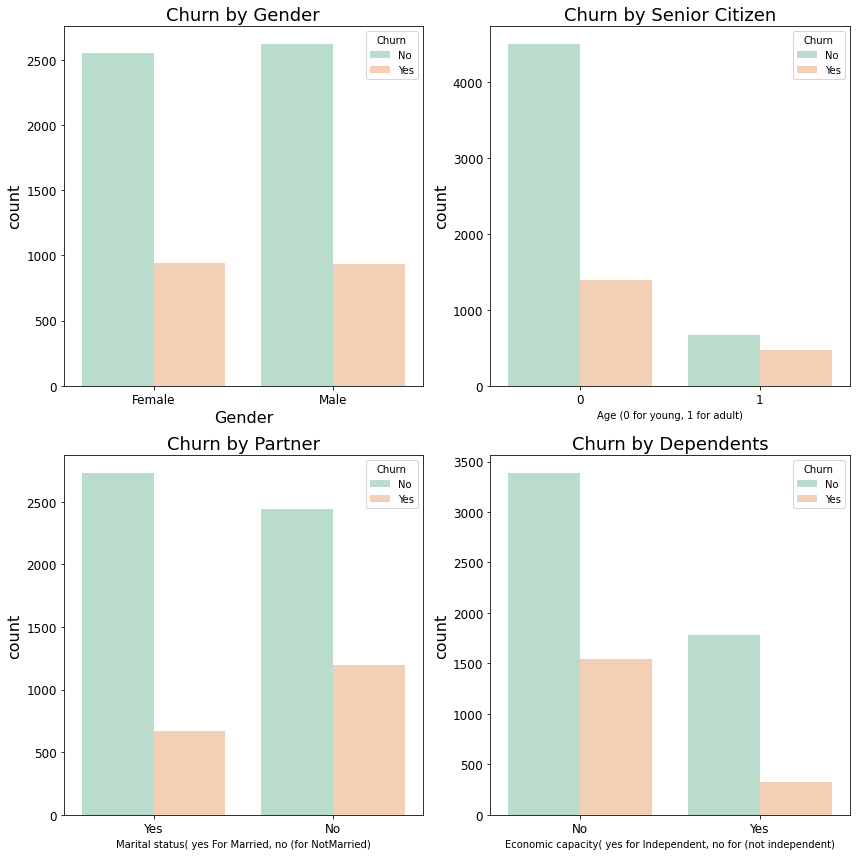

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
plt.subplot(2,2,1) 
# The palette parameter sets the color
gender=sns.countplot(x='gender',hue="Churn",data=CustDF,palette="Pastel2") 
plt.xlabel("Gender",fontsize=16)
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)     # Set axis font size
plt.title("Churn by Gender",fontsize=18)

plt.subplot(2,2,2)
seniorcitizen=sns.countplot(x="SeniorCitizen",hue="Churn",data=CustDF,palette="Pastel2")
plt.xlabel("Age (0 for young, 1 for adult)")
plt.title("Churn by Senior Citizen",fontsize=18)
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)   # Set axis font size

plt.subplot(2,2,3)
partner=sns.countplot(x="Partner",hue="Churn",data=CustDF,palette="Pastel2")
plt.xlabel("Marital status( yes For Married, no (for NotMarried)")
plt.title("Churn by Partner",fontsize=18)
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)   # Set axis font size

plt.subplot(2,2,4)
dependents=sns.countplot(x="Dependents",hue="Churn",data=CustDF,palette="Pastel2")
plt.xlabel("Economic capacity( yes for Independent, no for (not independent)")
plt.title("Churn by Dependents",fontsize=18)

plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)   # Set axis font size
plt.tight_layout()
plt.show()

#### Analysis
Gender: The churn rate has nothing to do with the gender.
SeniorCitizen: The number of young customers is high than the adult ones
Partner: The churn rate is higher in the umarried customers than the married.
Dependants:The churn rate for customers who are not independent is high compared to those that are independent.

### 2. Service Attibute Analysis

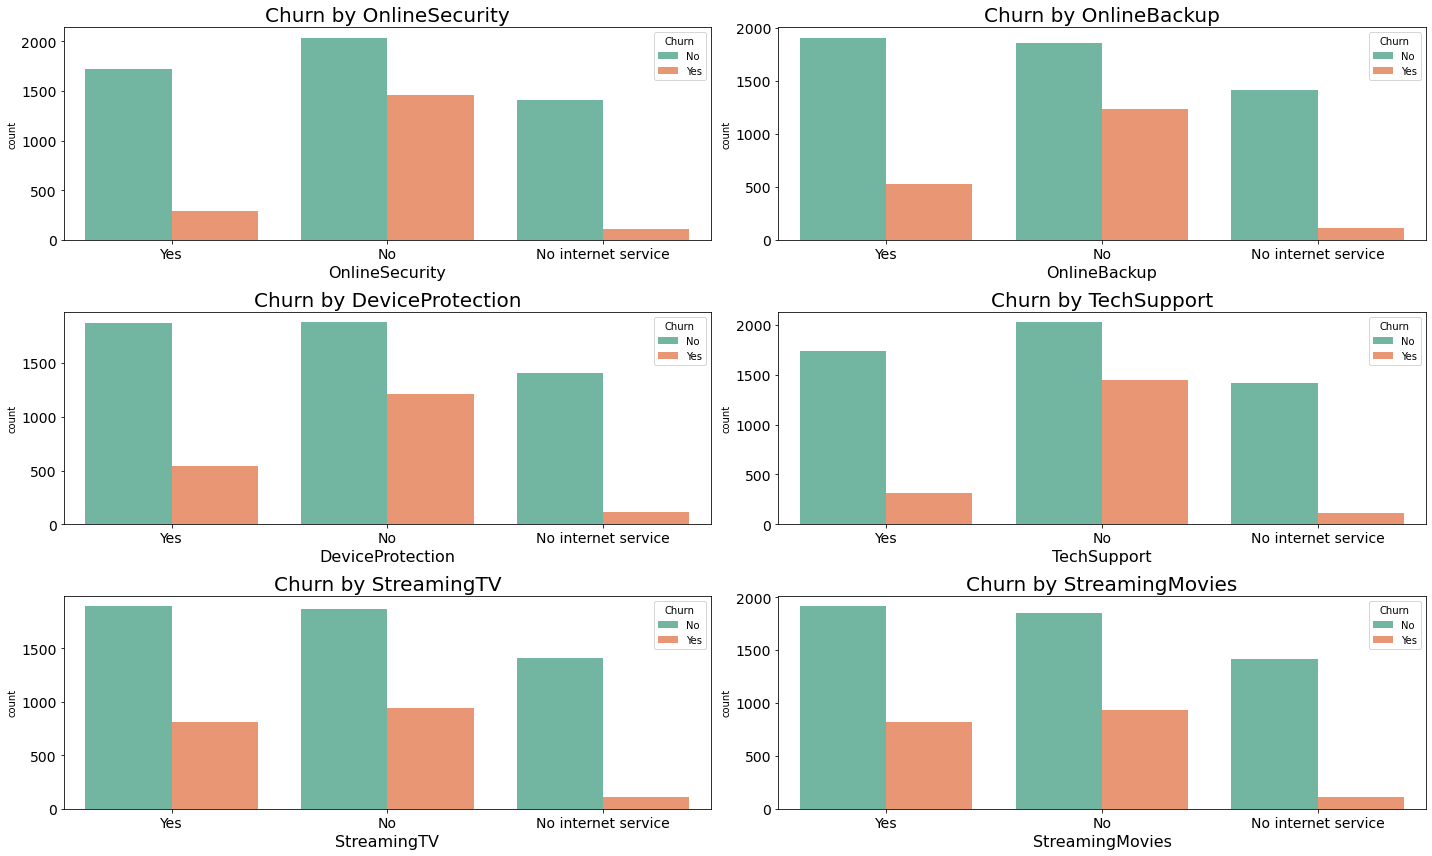

In [150]:
covariables=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
fig,axes=plt.subplots(3,2,figsize=(20,12))
for i, item in enumerate(covariables):
    '''
    0,'OnlineSecurity'
    1,'OnlineBackup'
    2,'DeviceProtection'
    '''
    plt.subplot(3,2,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=CustDF,palette="Set2",order=["Yes","No","No internet service"])
    plt.xlabel(str(item),fontsize=16)
    plt.tick_params(labelsize=14)     # Set axis font size
    plt.title("Churn by "+ str(item),fontsize=20)
    i=i+1
plt.tight_layout()
plt.show()

#### Analysis:
- Churn rate is low among the 6 services implying customer base is reltive stable because they seem satisfied with the services offered.
- The churn rate of no internet service is the low and reltively the same.

### Contract Attribute Analysis

Text(0.5, 1.0, 'Churn by Contract')

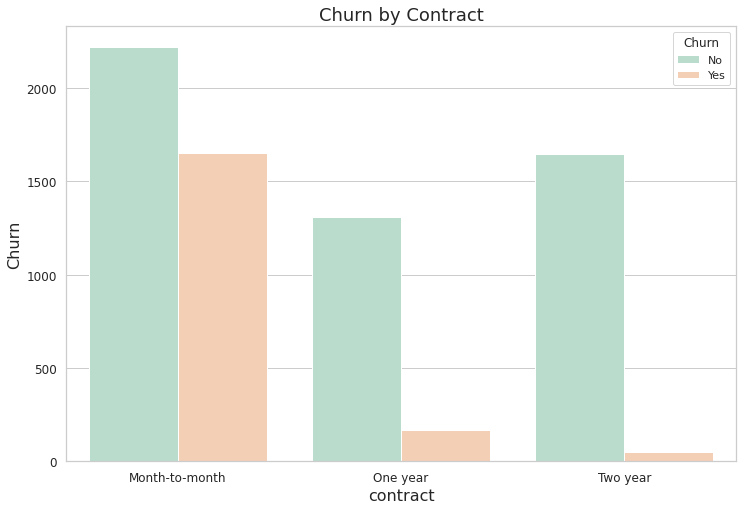

In [290]:
fig = plt.figure(figsize=(12,8))
contract=sns.countplot(x="Contract",hue="Churn",data=CustDF,palette="Pastel2",order=["Month-to-month","One year","Two year"]) 
plt.xlabel("contract",fontsize=16)
plt.ylabel('Churn',fontsize=16)
plt.tick_params(labelsize=12)     # Set axis font size
plt.title("Churn by Contract",fontsize=18)


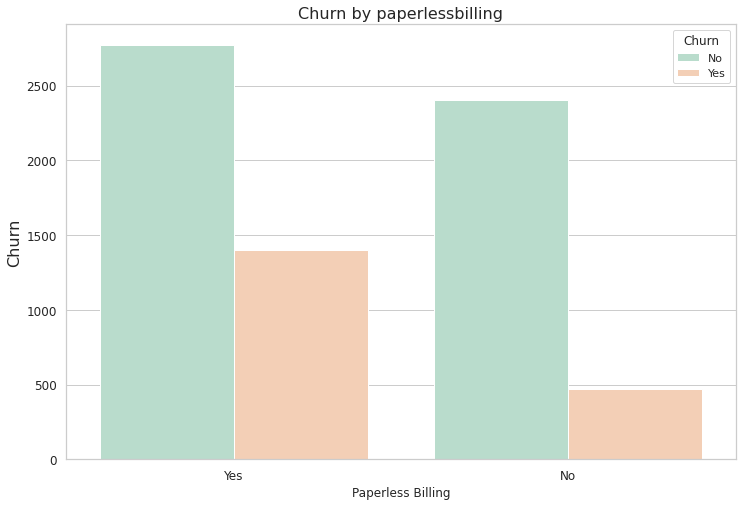

In [291]:
fig = plt.figure(figsize=(12,8))
paperlessbilling=sns.countplot(x="PaperlessBilling",hue="Churn",data=CustDF,palette="Pastel2", order=["Yes", "No"])
plt.xlabel("Paperless Billing")
plt.title("Churn by paperlessbilling",fontsize=16)
plt.ylabel('Churn',fontsize=16)
plt.tick_params(labelsize=12)   # Set axis font size


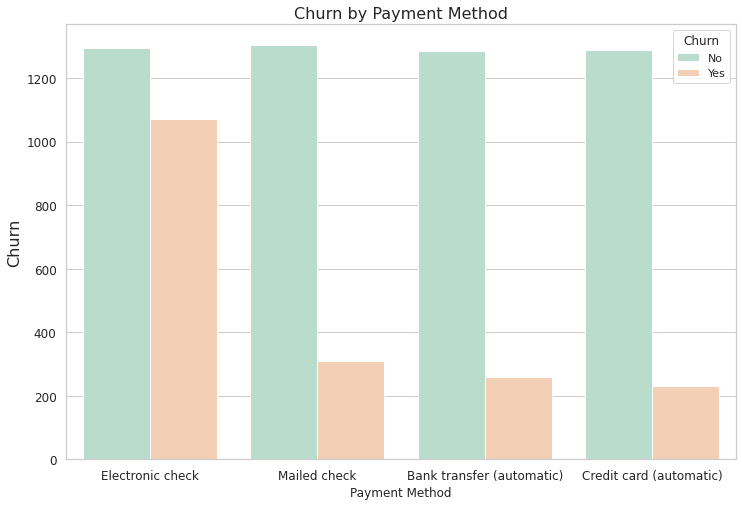

In [297]:
fig = plt.figure(figsize=(12,8))
paymentmethod=sns.countplot(x="PaymentMethod",hue="Churn",data=CustDF,palette="Pastel2", order=["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"])
plt.xlabel("Payment Method")
plt.title("Churn by Payment Method",fontsize=16)
plt.ylabel('Churn',fontsize=16)
plt.tick_params(labelsize=12)   # Set axis font size


In [425]:
# Save  the prepocessed dataset
CustDF.to_csv('churn_data.csv', index=False)
CustDF.to_excel('churn_data.xls', index=False)

# Data Preprocessing

In [329]:
#create a copy oof the old dataset to clean the data
cleanDF=CustDF.copy()

In [321]:
#Convert all categorical variables into dummy variables
CustDF_dummies = pd.get_dummies(CustDF)
CustDF_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


In [323]:
CustDF.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
Tenure_group          int64
dtype: object

In [423]:
#Create a new variable for independent features and new variable for target(x and y variables)
#x variables
x=cleanDF.drop('Churn', axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,1
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,5
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0


In [420]:
y =CustDF('Churn')
y

TypeError: 'DataFrame' object is not callable

In [429]:
# normalize the data to fit in the range
scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)

In [430]:
#Split the data into 80% training dataset and 20% testing dataset
X_train, X_test, y_train, y_test = train_test_split(features,Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5634, 19) (5634,)
(1409, 19) (1409,)


In [427]:
# Save  clean data
cleanDF.to_csv('clean_data.csv', index=False)
cleanDF.to_excel('clean_data.xls', index=False)


# Choosing the right  ML algorithm

In [431]:
#Algorithms format
models = []
models.append(('LogR', LogisticRegression()))
models.append(('LinDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SupVM', SVC()))

In [432]:
#split the data in to 80:20, 80% training dataset and 20% testing dataset.

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=5, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogR: 0.795528 (0.011959)
LinDA: 0.793044 (0.008723)
KNC: 0.742278 (0.006582)
DTC: 0.727548 (0.011386)
GNB: 0.751507 (0.008937)
SupVM: 0.789316 (0.011149)


Logistic Regression algorithm performed better on the dataset.

# Model Training using Logistic Algorithm

In [439]:
#Create the model
LogReg = LogisticRegression() 
#fit the training data to the model
Model=LogReg.fit(X_train,y_train) 
print(Model)


LogisticRegression()


# Evaluating model performance

In [441]:
#Accuracy
 #predicts the test dataset class labels of each sample
ClassesPredicted = Model.predict(X_test)
#predicts the probability of each sample in the test data
ProbPredicted=Model.predict_proba(X_test) 
#taccuracy metrics
print(classification_report(y_test,ClassesPredicted)) 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1048
           1       0.64      0.58      0.61       361

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.80      0.81      0.81      1409



Precision is 86%
Recall is 89%
Accuracy is 81%

# Save and load the model

In [442]:
#save the model
import pickle

In [443]:
filename = 'ClientLoyalityModel.sav'

In [445]:
pickle.dump('Model',open(filename, 'wb'))

# Deploy Model with Dash